<a href="https://colab.research.google.com/github/22b1074/Vehicle-Detection-IE-643-/blob/main/FEWSHOT_FINETUNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
# Install the required dependencies
!pip install -r requirements.txt
%cd ..

Cloning into 'yolov5'...
remote: Enumerating objects: 17063, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 17063 (delta 21), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17063/17063), 15.68 MiB | 31.79 MiB/s, done.
Resolving deltas: 100% (11711/11711), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00
/content


In [ ]:
classes_of_interest = {
    'bicycle': 0,
    'motorcycle': 1,
    'car': 2,
    'truck': 3,
    'bus': 4
}

In [ ]:
import shutil
import os
source_path = '/content/drive/MyDrive/Rainy/train/labels'
destination_path = '/content/input_combined/train/labels'
os.makedirs(destination_path, exist_ok=True)
filenames = os.listdir(source_path)
for filename in filenames:
    if filename.endswith('.txt'):
        source_file = os.path.join(source_path, filename)
        destination_file = os.path.join(destination_path, filename)
        shutil.copy(source_file, destination_file)

In [ ]:
import shutil
import os
source_path = '/content/drive/MyDrive/foggy_fewshot_IE643/train/labels'
destination_path = '/content/input_combined/train/labels'
os.makedirs(destination_path, exist_ok=True)
filenames = os.listdir(source_path)
for filename in filenames:
    if filename.endswith('.txt'):
        source_file = os.path.join(source_path, filename)
        destination_file = os.path.join(destination_path, filename)
        shutil.copy(source_file, destination_file)

In [ ]:
import shutil
source_path = '/content/drive/MyDrive/Rainy/train/images'
destination_path = '/content/input_combined/train/images'
os.makedirs(destination_path, exist_ok=True)
filenames = os.listdir(source_path)
for filename in filenames:
    if filename.endswith('.png'):
        source_file = os.path.join(source_path, filename)
        destination_file = os.path.join(destination_path, filename)
        shutil.copy(source_file, destination_file)

In [ ]:
import shutil
source_path = '/content/drive/MyDrive/foggy_fewshot_IE643/train/images'
destination_path = '/content/input_combined/train/images'
os.makedirs(destination_path, exist_ok=True)
filenames = os.listdir(source_path)
for filename in filenames:
    if filename.endswith('.png'):
        source_file = os.path.join(source_path, filename)
        destination_file = os.path.join(destination_path, filename)
        shutil.copy(source_file, destination_file)

In [ ]:
dir_path = '/content/drive/MyDrive/Rainy/val/labels'
for filename in os.listdir(dir_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(dir_path, filename)
        if '_aug_' in filename:
            file_index = int(filename.split('_aug_')[1].split('.')[0])
            if file_index > 4:
              os.remove(file_path)
              print(f"Deleted file: {file_path}")


Deleted file: /content/drive/MyDrive/Rainy/val/labels/frankfurt_000000_003920_rainy_aug_15.txt
Deleted file: /content/drive/MyDrive/Rainy/val/labels/lindau_000023_000019_rainy_aug_9.txt
Deleted file: /content/drive/MyDrive/Rainy/val/labels/frankfurt_000000_003920_rainy_aug_16.txt
Deleted file: /content/drive/MyDrive/Rainy/val/labels/lindau_000023_000019_rainy_aug_12.txt
Deleted file: /content/drive/MyDrive/Rainy/val/labels/lindau_000023_000019_rainy_aug_10.txt
Deleted file: /content/drive/MyDrive/Rainy/val/labels/lindau_000023_000019_rainy_aug_5.txt
Deleted file: /content/drive/MyDrive/Rainy/val/labels/frankfurt_000000_015389_rainy_aug_14.txt
Deleted file: /content/drive/MyDrive/Rainy/val/labels/frankfurt_000000_015389_rainy_aug_18.txt
Deleted file: /content/drive/MyDrive/Rainy/val/labels/frankfurt_000000_015389_rainy_aug_5.txt
Deleted file: /content/drive/MyDrive/Rainy/val/labels/frankfurt_000000_003920_rainy_aug_5.txt
Deleted file: /content/drive/MyDrive/Rainy/val/labels/lindau_00002

In [ ]:
import os

# label files
label_dir = '/content/input_combined/val/labels'  # Change path if needed

class_counts = {label: 0 for label in classes_of_interest.keys()}
num_files = 0
# Iterate over all label files
for label_file in os.listdir(label_dir):
    if label_file.endswith('.txt') and 'rainy' in label_file:  # Ensure it's a label file
        with open(os.path.join(label_dir, label_file), 'r') as f:
            lines = f.readlines()
            num_files += 1
            for line in lines:
                class_id = int(float(line.split()[0]))  # class id extraction
                for class_name, id in classes_of_interest.items():
                    if class_id == id:
                        class_counts[class_name] += 1

# Print the number of images in each class
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} instances")

total_instances = sum(class_counts.values())
num_classes = 5
class_weights = {class_name: total_instances / (num_classes * count) for class_name, count in class_counts.items()}
print(class_weights)
print(num_files)

bicycle: 12 instances
motorcycle: 7 instances
car: 37 instances
truck: 7 instances
bus: 10 instances
{'bicycle': 1.2166666666666666, 'motorcycle': 2.085714285714286, 'car': 0.3945945945945946, 'truck': 2.085714285714286, 'bus': 1.46}
18


In [ ]:
class_weights_here = [0.692929292929293, 1.673170731707317,  0.6125, 1.491304347826087,  1.5244444444444445]

In [ ]:
# Path to the train.py file
train_py_path = '/content/yolov5/classify/train.py'

# Read the file
with open(train_py_path, 'r') as file:
    lines = file.readlines()

# Print the 190th to 200th lines to check the context
for i in range(190, 200):
    print(f"{i+1}: {lines[i]}")

# Prepare the new criterion line with class weights
new_criterion_line = f"    criterion = smartCrossEntropyLoss(label_smoothing=opt.label_smoothing, class_weights={class_weights_here})  # loss function\n"

lines[198] = new_criterion_line
# Restore the 200th line
#lines[199] = "    best_fitness = 0.0\n"
# Write the modified content back to the file
with open(train_py_path, 'w') as file:
    file.writelines(lines)


191:     ema = ModelEMA(model) if RANK in {-1, 0} else None

192: 

193:     # DDP mode

194:     if cuda and RANK != -1:

195:         model = smart_DDP(model)

196: 

197:     # Train

198:     t0 = time.time()

199:     criterion = smartCrossEntropyLoss(label_smoothing=opt.label_smoothing)  # loss function

200:     best_fitness = 0.0



In [ ]:
# Path to the yolov5m.yaml file
yaml_path = "/content/yolov5/models/yolov5m.yaml"

# Open the file, read contents, and modify 'nc'
with open(yaml_path, 'r') as file:
    lines = file.readlines()

# Rewrite the file with updated number of classes
with open(yaml_path, 'w') as file:
    for line in lines:
        if line.strip().startswith('nc:'):
            file.write('nc: 5\n')  # Updateing to 5 classes from 80classes in yolo5vm.yaml
        else:
            file.write(line)

print("Updated yolov5m.yaml with nc=5.")

Updated yolov5m.yaml with nc=5.


In [ ]:
# Define paths and class names
train_images_path = '/content/input_combined/train/images'  # Path to your training images
train_labels_path = '/content/input_combined/train/labels'  # Path to your training labels
val_images_path = '/content/input_combined/val/images'      # Path to your validation images
val_labels_path = '/content/input_combined/val/labels'      # Path to your validation labels

# Define class names
class_names = ['bicycle', 'motorcycle', 'car', 'truck', 'bus']  # Adjust to your classes

# Create the data.yaml file
data_yaml_content = f"""
train: {train_images_path}
val: {val_images_path}

nc: {len(class_names)}  # Number of classes
names: {class_names}  # Class names
"""
os.makedirs('/content/working', exist_ok=True)
# Write to data.yaml file
with open('/content/working/data.yaml', 'w') as f:
    f.write(data_yaml_content)

print("data.yaml file created successfully!")

data.yaml file created successfully!


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
!python train.py --img 640 --batch-size 8 --epochs 100 --data /content/working/data.yaml --cfg yolov5m.yaml --weights '/content/drive/MyDrive/yolov5_training/yolov5_custom19/weights/best.pt' --freeze 7 --name yolov5_combined_finetune --project '/content/drive/MyDrive/yolov5_combined_finetuning'


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
train: weights=/content/drive/MyDrive/yolov5_training/yolov5_custom19/weights/best.pt, cfg=yolov5m.yaml, data=/content/working/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/content/drive/MyDrive/yolov5_combined_finetuning, name=yolov5_combined_finetune, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[7], save_period=-1, seed

Above is 7 layers freezed and its result is

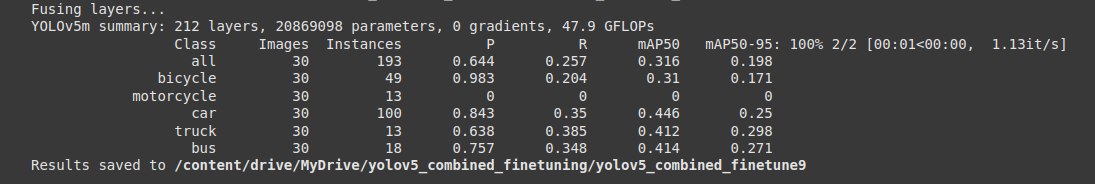

In [ ]:
!python train.py --img 640 --batch-size 8 --epochs 100 --data /content/working/data.yaml --cfg yolov5m.yaml --weights '/content/drive/MyDrive/yolov5_training/yolov5_custom19/weights/best.pt' --freeze 10 --name yolov5_combined_finetune --project '/content/drive/MyDrive/yolov5_combined_finetuning'


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
train: weights=/content/drive/MyDrive/yolov5_training/yolov5_custom19/weights/best.pt, cfg=yolov5m.yaml, data=/content/working/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/content/drive/MyDrive/yolov5_combined_finetuning, name=yolov5_combined_finetune, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[10], save_period=-1, see

Above is 10 layers freezed fine-tuning

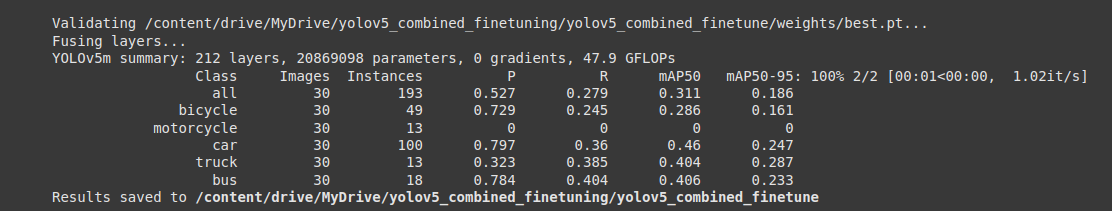


In [ ]:
!python train.py --img 640 --batch-size 8 --epochs 100 --data /content/working/data.yaml --cfg yolov5m.yaml --weights '/content/drive/MyDrive/yolov5_training/yolov5_custom19/weights/best.pt' --freeze 20 --name yolov5_combined_finetune --project '/content/drive/MyDrive/yolov5_combined_finetuning'


train: weights=/content/drive/MyDrive/yolov5_training/yolov5_custom19/weights/best.pt, cfg=yolov5m.yaml, data=/content/working/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/content/drive/MyDrive/yolov5_combined_finetuning, name=yolov5_combined_finetune, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[20], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-386-g81ac034a Python-3.10.12 torch-2.5.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0

Above fine-tuning is 20 layers freezed

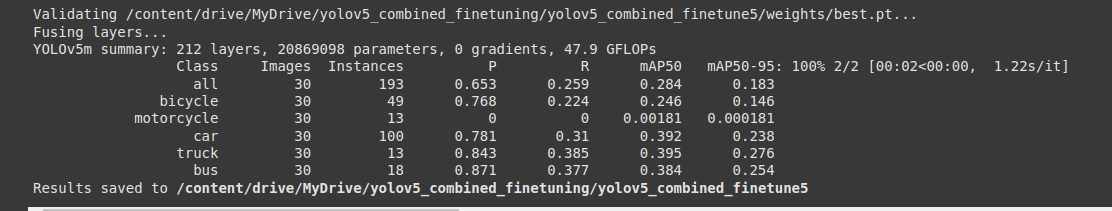

In [ ]:
!python train.py --img 640 --batch-size 8 --epochs 100 --data /content/working/data.yaml --cfg yolov5m.yaml --weights '/content/drive/MyDrive/yolov5_training/yolov5_custom19/weights/best.pt' --freeze 15 --name yolov5_combined_finetune --project '/content/drive/MyDrive/yolov5_combined_finetuning'


train: weights=/content/drive/MyDrive/yolov5_training/yolov5_custom19/weights/best.pt, cfg=yolov5m.yaml, data=/content/working/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/content/drive/MyDrive/yolov5_combined_finetuning, name=yolov5_combined_finetune, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[15], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-386-g81ac034a Python-3.10.12 torch-2.5.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0

In [ ]:
!python train.py --img 640 --batch-size 8 --epochs 100 --data /content/working/data.yaml --cfg yolov5m.yaml --weights '/content/drive/MyDrive/yolov5_training/yolov5_custom19/weights/best.pt' --freeze 17 --name yolov5_combined_finetune --project '/content/drive/MyDrive/yolov5_combined_finetuning'


train: weights=/content/drive/MyDrive/yolov5_training/yolov5_custom19/weights/best.pt, cfg=yolov5m.yaml, data=/content/working/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/content/drive/MyDrive/yolov5_combined_finetuning, name=yolov5_combined_finetune, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[17], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-386-g81ac034a Python-3.10.12 torch-2.5.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0